## RNN Keras - Sine Wave

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Creating training & test data

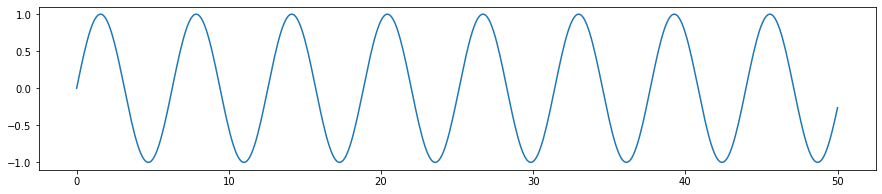

In [6]:
x = np.linspace(0,50,501)
y = np.sin(x)

plt.figure(figsize=(15,3))
plt.plot(x,y)
plt.show()

In [7]:
df = pd.DataFrame(data=y, index=x ,columns=['Sine'])
df.head()

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


In [8]:
train = df.iloc[:450]
test = df.iloc[450:]

### Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

### Batching

In [11]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

length=50
batch_size=1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)
len(generator)

400

In [12]:
x, y = generator[0]
print("X is \n",x,"\ny is",y)

X is 
 [[[4.99999116e-01]
  [5.49916225e-01]
  [5.99334579e-01]
  [6.47760405e-01]
  [6.94709850e-01]
  [7.39713809e-01]
  [7.82322618e-01]
  [8.22110545e-01]
  [8.58680040e-01]
  [8.91665714e-01]
  [9.20737985e-01]
  [9.45606372e-01]
  [9.66022399e-01]
  [9.81782075e-01]
  [9.92727935e-01]
  [9.98750612e-01]
  [9.99789928e-01]
  [9.95835500e-01]
  [9.86926839e-01]
  [9.73152957e-01]
  [9.54651478e-01]
  [9.31607263e-01]
  [9.04250562e-01]
  [8.72854714e-01]
  [8.37733417e-01]
  [7.99237589e-01]
  [7.57751870e-01]
  [7.13690771e-01]
  [6.67494535e-01]
  [6.19624741e-01]
  [5.70559686e-01]
  [5.20789614e-01]
  [4.70811810e-01]
  [4.21125636e-01]
  [3.72227539e-01]
  [3.24606094e-01]
  [2.78737119e-01]
  [2.35078919e-01]
  [1.94067715e-01]
  [1.56113277e-01]
  [1.21594831e-01]
  [9.08572769e-02]
  [6.42077324e-02]
  [4.19124713e-02]
  [2.41942605e-02]
  [1.12301346e-02]
  [3.14962674e-03]
  [3.34747619e-05]
  [1.91281421e-03]
  [8.76886734e-03]]] 
y is [[0.02053313]]


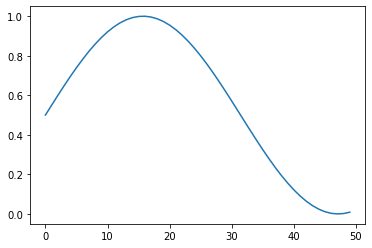

In [13]:
plt.plot(x[0])
plt.show()

#    

## RNN Model

In [36]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

n_features=1

model = Sequential()
model.add(SimpleRNN(50, input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit_generator(generator, epochs=5)

  ...
    to  
  ['...']
Train for 400 steps
Epoch 1/5
400/400 [==============================] - 7s 16ms/step - loss: 0.0048
Epoch 2/5
400/400 [==============================] - 6s 15ms/step - loss: 1.3021e-04
Epoch 3/5
400/400 [==============================] - 6s 14ms/step - loss: 3.0176e-05
Epoch 4/5
400/400 [==============================] - 6s 14ms/step - loss: 6.7337e-05
Epoch 5/5
400/400 [==============================] - 6s 14ms/step - loss: 3.3244e-05


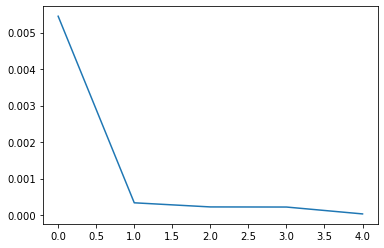

In [45]:
loss = pd.DataFrame(model.history.history)
plt.plot(loss)

### Evaluation

In [38]:
eval_batch = scaled_train[-length:]
eval_batch = eval_batch.reshape(1, length, n_features)
eval_batch.shape

(1, 50, 1)

In [39]:
print("Model prediction ",model.predict(eval_batch)[0][0])
print("True Value ",scaled_test[0][0])

Model prediction  0.92010933
True Value  0.9254542925871709


In [40]:
test_predictions = []

eval_batch = scaled_train[-length:]
current_batch = eval_batch.reshape(1, length, n_features)


for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

In [41]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[ 0.84021369],
       [ 0.88726689],
       [ 0.92558807],
       [ 0.95479257],
       [ 0.9762745 ],
       [ 0.98704378],
       [ 0.98901716],
       [ 0.97930216],
       [ 0.96061852],
       [ 0.93407559],
       [ 0.89866964],
       [ 0.85480634],
       [ 0.80255613],
       [ 0.7433289 ],
       [ 0.6776562 ],
       [ 0.60584617],
       [ 0.52871099],
       [ 0.44716093],
       [ 0.36025114],
       [ 0.26979943],
       [ 0.17628538],
       [ 0.07994955],
       [-0.01851021],
       [-0.11833336],
       [-0.21837854],
       [-0.3189496 ],
       [-0.41884088],
       [-0.51740075],
       [-0.61353241],
       [-0.70807189],
       [-0.80012847],
       [-0.88915424],
       [-0.97565212],
       [-1.05856529],
       [-1.13784841],
       [-1.2121448 ],
       [-1.28101563],
       [-1.34343829],
       [-1.39733733],
       [-1.44259167],
       [-1.47692171],
       [-1.49928072],
       [-1.5085109 ],
       [-1.50420057],
       [-1.48600312],
       [-1

In [42]:
test["Predictions"] = true_predictions
test.head()

C:\Users\subha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Sine,Predictions
45.0,0.850904,0.840214
45.1,0.899097,0.887267
45.2,0.938307,0.925588
45.3,0.968142,0.954793
45.4,0.988304,0.976275


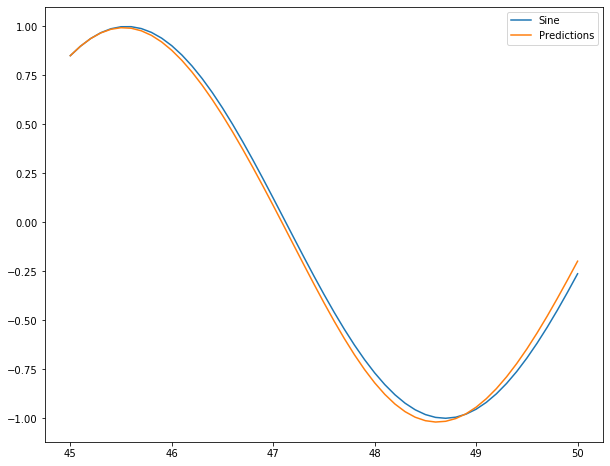

In [67]:
test.plot(figsize=(10,8))
plt.show()

#      

## LSTM Model

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", patience=2)

In [44]:
length=50
batch_size=1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=batch_size)

In [45]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

n_features=1

model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit_generator(generator, epochs=20, validation_data = validation_generator, callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 400 steps, validate for 1 steps
Epoch 1/20
400/400 [==============================] - 10s 25ms/step - loss: 0.0278 - val_loss: 2.0460e-04
Epoch 2/20
400/400 [==============================] - 8s 21ms/step - loss: 1.7244e-04 - val_loss: 1.6216e-04
Epoch 3/20
400/400 [==============================] - 8s 19ms/step - loss: 1.1464e-04 - val_loss: 4.5697e-06
Epoch 4/20
400/400 [==============================] - 8s 19ms/step - loss: 2.8952e-04 - val_loss: 3.8566e-06
Epoch 5/20
400/400 [==============================] - 8s 19ms/step - loss: 2.1334e-04 - val_loss: 1.1907e-05
Epoch 6/20
400/400 [==============================] - 8s 20ms/step - loss: 6.7479e-05 - val_loss: 1.3042e-05


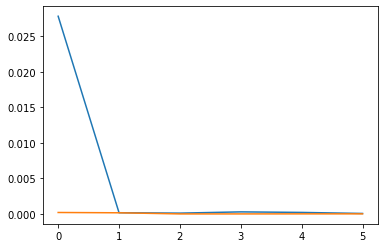

In [48]:
loss = pd.DataFrame(model.history.history)
plt.plot(loss)

In [49]:
test_predictions = []

eval_batch = scaled_train[-length:]
current_batch = eval_batch.reshape(1, length, n_features)


for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

true_predictions = scaler.inverse_transform(test_predictions)
test["LSTM Predictions"] = true_predictions
test.head()

C:\Users\subha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Sine,Predictions,LSTM Predictions
45.0,0.850904,0.840214,0.900306
45.1,0.899097,0.887267,0.954073
45.2,0.938307,0.925588,1.001696
45.3,0.968142,0.954793,1.041796
45.4,0.988304,0.976275,1.073575


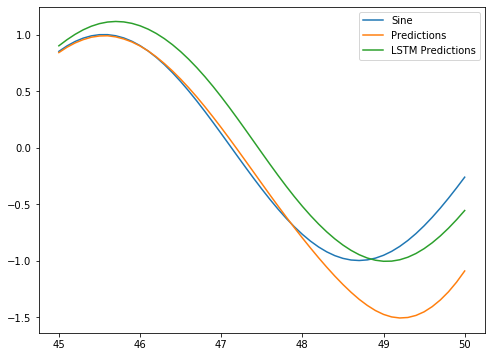

In [51]:
test.plot(figsize=(8,6))
plt.show()

In [52]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=batch_size)

model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")
model.fit_generator(generator, epochs=6)

  ...
    to  
  ['...']
Train for 451 steps
Epoch 1/6
451/451 [==============================] - 11s 25ms/step - loss: 0.0107
Epoch 2/6
451/451 [==============================] - 10s 23ms/step - loss: 1.4860e-04 0s - loss: 1.479
Epoch 3/6
451/451 [==============================] - 10s 22ms/step - loss: 2.4651e-04
Epoch 4/6
451/451 [==============================] - 10s 21ms/step - loss: 1.4720e-04
Epoch 5/6
451/451 [==============================] - 10s 22ms/step - loss: 9.3015e-05
Epoch 6/6
451/451 [==============================] - 9s 20ms/step - loss: 3.9119e-04


In [62]:
forecast = []

eval_batch = scaled_train[-length:]
current_batch = eval_batch.reshape(1, length, n_features)


for i in range(50):
    current_pred = model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

In [63]:
forecast = full_scaler.inverse_transform(forecast)
forecast_index = np.arange(50.1,55.1, step=0.1)

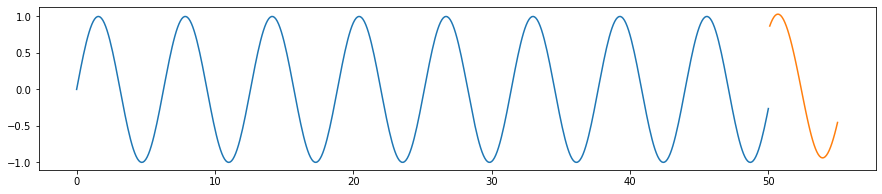

In [64]:
plt.figure(figsize=(15,3))
plt.plot(df.index, df["Sine"])
plt.plot(forecast_index, forecast)
plt.show()